In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [3]:
# create engine to hawaii.sqlite
hawaii_engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# CREATE the inspector and connect it to the engine
inspector_gadget = inspect(hawaii_engine)

# get all tables
table_names = inspector_gadget.get_table_names()
for table in table_names:
    print(table)
    
    # get columns for table
    for column in inspector_gadget.get_columns(table):
        print(column)
        
    print()

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoi

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=hawaii_engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(hawaii_engine)

In [9]:
# Display the row's columns and data in dictionary format
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x141ea1e4c40>,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0}

In [10]:
# Display the row's columns and data in dictionary format
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x141ea1e4c10>,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set. 08/23/2017
date_query = text("""
                SELECT
                    date,
                    count(*) as num_records
                FROM
                    measurement
                GROUP BY
                    date
                ORDER BY
                    date desc
                    limit 10
            """)

pd.read_sql(date_query, hawaii_engine)

,date,num_records
0,2017-08-23,4
1,2017-08-22,3
2,2017-08-21,4
3,2017-08-20,3
4,2017-08-19,4
5,2017-08-18,4
6,2017-08-17,4
7,2017-08-16,4
8,2017-08-15,5
9,2017-08-14,5


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# 08/23/2016 - 08/23/2017

# Perform a query to retrieve the date and precipitation scores
prcp_year_query = text("""
                SELECT
                    date,
                    ROUND(avg(prcp), 2) as avg_prcp
                FROM
                    measurement
                WHERE
                    date >= '2016-08-23'
                GROUP BY
                    date
            """)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_year_df = pd.read_sql(prcp_year_query, hawaii_engine)
prcp_year_df = prcp_year_df.rename(columns={"date":"Date", "avg_prcp":"Avg_Prcp_Inches"})
prcp_year_df.head(20)

,Date,Avg_Prcp_Inches
0,2016-08-23,0.45
1,2016-08-24,1.56
2,2016-08-25,0.08
3,2016-08-26,0.02
4,2016-08-27,0.06
5,2016-08-28,0.52
6,2016-08-29,0.24
7,2016-08-30,0.01
8,2016-08-31,0.64
9,2016-09-01,0.01


In [13]:
# take a quick look at the dataframe
prcp_year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             366 non-null    object 
 1   Avg_Prcp_Inches  366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [14]:
# fix the data type for the Date column
prcp_year_df["Date"] = pd.to_datetime(prcp_year_df["Date"])
prcp_year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             366 non-null    datetime64[ns]
 1   Avg_Prcp_Inches  366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [15]:
# Sort the dataframe by date
prcp_year_df1 = prcp_year_df.sort_values(by="Date", ascending=True)

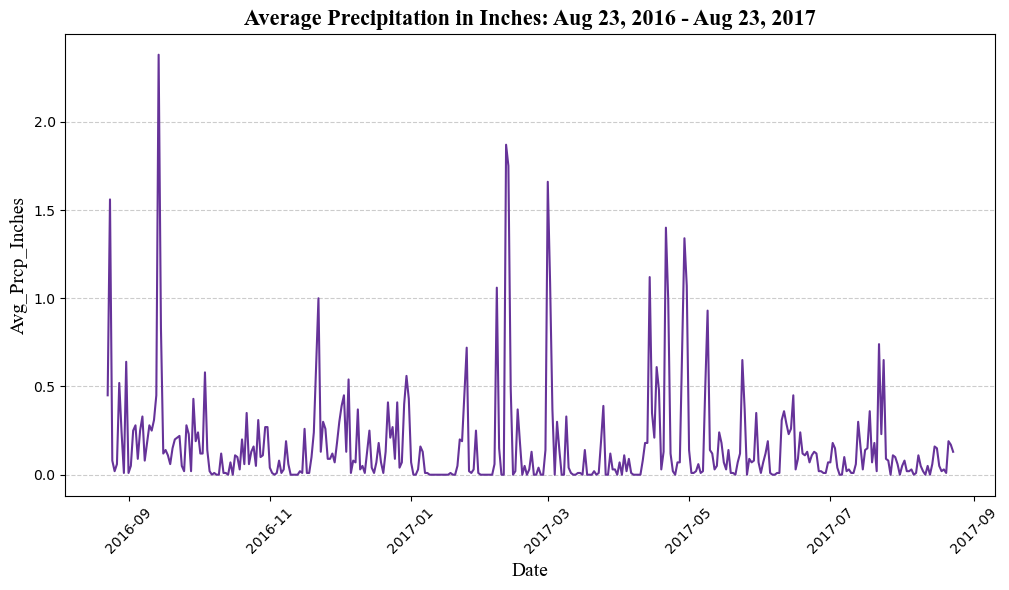

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(12,6))
plt.plot(prcp_year_df1.Date, prcp_year_df1.Avg_Prcp_Inches, color='rebeccapurple')
plt.title("Average Precipitation in Inches: Aug 23, 2016 - Aug 23, 2017", fontname='Times New Roman', size=16, weight='bold')
plt.xlabel("Date", fontname='Times New Roman', size=14)
plt.ylabel("Avg_Prcp_Inches", fontname='Times New Roman', size=14)
plt.xticks(rotation=45)
plt.grid(axis="y", c="gray", linestyle="dashed", alpha=0.4)
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_year_df1.describe()

,Avg_Prcp_Inches
count,366.000000
mean,0.171339
std,0.295857
min,0.000000
25%,0.010000
50%,0.070000
75%,0.190000
max,2.380000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset - 9
station_query = text("""
                SELECT
                    COUNT(DISTINCT station) as Ttl_Number_Stations
                FROM
                    station
            """)

pd.read_sql(station_query, hawaii_engine)

,Ttl_Number_Stations
0,9


In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order. Waihee station USC00519281-2772
active_station_query = text("""
                SELECT
                    s.name,
                    s.station,
                    COUNT(m.station) as station_activity
                FROM
                    station as s
                    JOIN measurement as m on s.station = m.station
                GROUP BY
                    m.station
                ORDER BY
                    station_activity DESC
            """)

pd.read_sql(active_station_query, hawaii_engine)

,name,station,station_activity
0,"WAIHEE 837.5, HI US",USC00519281,2772
1,"WAIKIKI 717.2, HI US",USC00519397,2724
2,"KANEOHE 838.1, HI US",USC00513117,2709
3,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,2669
4,"MANOA LYON ARBO 785.2, HI US",USC00516128,2612
5,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,2202
6,"HONOLULU OBSERVATORY 702.2, HI US",USC00511918,1979
7,"PEARL CITY, HI US",USC00517948,1372
8,"UPPER WAHIAWA 874.3, HI US",USC00518838,511


In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_stat_query = text("""
                SELECT
                    station,
                    min(tobs) as low_temp,
                    max(tobs) as high_temp,
                    round(avg(tobs), 2) as avg_temp
                FROM
                    measurement
                where
                    station = 'USC00519281';
            """)

pd.read_sql(station_stat_query, hawaii_engine)

,station,low_temp,high_temp,avg_temp
0,USC00519281,54.0,85.0,71.66


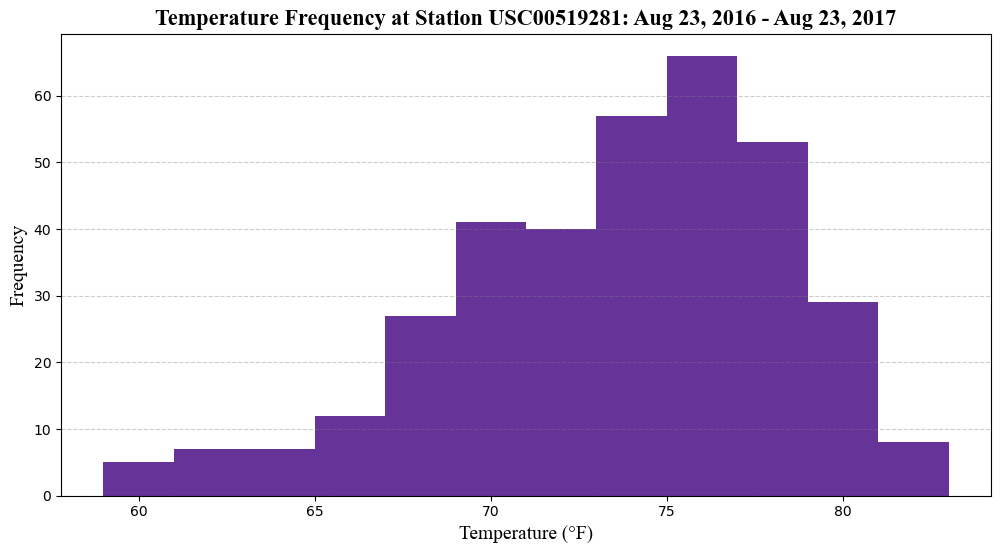

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_year_query = text("""
                SELECT
                    date,
                    station,
                    tobs as temp
                FROM
                    measurement
                WHERE
                    date >= '2016-08-23'
                    and station = 'USC00519281'
            """)

temp_year_df = pd.read_sql(temp_year_query, hawaii_engine)
plt.figure(figsize=(12,6))
plt.hist(temp_year_df.temp, bins=12, color='rebeccapurple')
plt.title("Temperature Frequency at Station USC00519281: Aug 23, 2016 - Aug 23, 2017", fontname='Times New Roman', size=16, weight='bold')
plt.xlabel('Temperature (°F)', fontname='Times New Roman', size=14)
plt.ylabel('Frequency', fontname='Times New Roman', size=14)
plt.grid(axis='y', c='gray', linestyle='dashed', alpha=0.4)
plt.show()

# Close Session

In [22]:
# Close Session
session.close()